# Canada GDP Prediction

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as scikit


### Load the dataset

In [40]:
path = "API_NY.GDP.MKTP.CD_DS2_en_csv_v2_2752.csv"
dataset = pd.read_csv(path, skiprows=4)

canada_gdp = dataset[dataset['Country Name'] == 'Canada']
canada_gdp = canada_gdp.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'])

### Reshape the DataFrame
Using melt(), Reshaping the data in 3 columns makes it easier to handle.

#### Notes:

pd.to_numeric(), the errors='coerce' will replace values that can't be converted with NaN.

dropna(subset=['Year', 'GDP']) drops missing values (NaN).

In [41]:
canada_gdp = canada_gdp.melt(id_vars=['Country Name'], var_name='Year', value_name='GDP')
canada_gdp['Year'] = pd.to_numeric(canada_gdp['Year'], errors='coerce')
canada_gdp = canada_gdp.dropna(subset=['Year', 'GDP'])


### Modeling Preperation

In [55]:
X, y = canada_gdp['Year'].values.reshape(-1, 1), canada_gdp['GDP'].values


### Test visualization comparing to World Bank data graph
https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?locations=CA

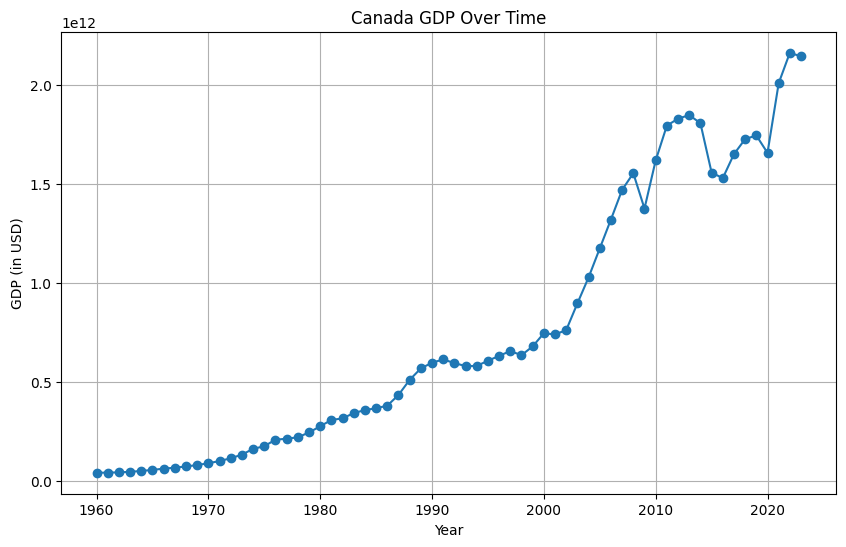

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(X, y, marker='o')
plt.xlabel('Year')
plt.ylabel('GDP (in USD)')
plt.title('Canada GDP Over Time')
plt.grid(True)
plt.show()


### Split the data into training and testing sets

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)